### Importing frameworks and reading the data file

In [0]:
# Importing the required frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [0]:
# Reading the data file into a variable
df = pd.read_csv('/content/drive/Shared drives/257 Project/US_Accidents_May19.csv')

In [0]:
# Printing the top 5 rows of the dataset
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
# Changing the time variable format
df['time'] = pd.to_datetime(df.Start_Time, format='%Y-%m-%d %H:%M:%S')
df = df.set_index('time')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2016-02-08 06:07:59,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2016-02-08 06:49:27,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
2016-02-08 07:23:34,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
2016-02-08 07:39:07,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


# Preprocessing

In [6]:
# Shape of the dataset
df1 = df
df1.shape

(2243939, 49)

In [7]:
# Number of null values in the data
df1.isnull().sum()

ID                             0
Source                         0
TMC                       516762
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  1727177
End_Lng                  1727177
Distance(mi)                   0
Description                    1
Number                   1458402
Street                         0
Side                           0
City                          68
County                         0
State                          0
Zipcode                      646
Country                        0
Timezone                    2141
Airport_Code               23664
Weather_Timestamp          47170
Temperature(F)             62265
Wind_Chill(F)            1852370
Humidity(%)                64467
Pressure(in)               57280
Visibility(mi)             71360
Wind_Direction             47190
Wind_Speed(mph)           442954
Precipitat

In [8]:
# printing the number of rows of severity
print(df1['Severity'].value_counts())

2    1455524
3     715582
4      72002
1        814
0         17
Name: Severity, dtype: int64


In [0]:
# Drop unnecessary columns with more than 70% null values
df1 = df1.drop(['Distance(mi)', 'TMC', 'Country', 'Description', 'City', 'County', 'Street', 'Side', 'Zipcode', 'State', 'Airport_Code', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'], axis=1)

In [10]:
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Number,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 05:46:00,A-1,MapQuest,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,NaN,US/Eastern,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2016-02-08 06:07:59,A-2,MapQuest,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,2584.0,US/Eastern,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2016-02-08 06:49:27,A-3,MapQuest,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,NaN,US/Eastern,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night
2016-02-08 07:23:34,A-4,MapQuest,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,NaN,US/Eastern,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2016-02-08 07:39:07,A-5,MapQuest,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,NaN,US/Eastern,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day


In [0]:
# Drop some more columns
cols = ["End_Lat", "End_Lng", "Number", "Wind_Chill(F)", "Precipitation(in)", "Start_Time", "End_Time", "Timezone", "Weather_Timestamp"]
df1 = df1.drop(cols, axis=1)

In [12]:
# Removing the rows with null values
df1 = df1.dropna(axis = 0)
df1.shape

(1780156, 26)

In [13]:
# Checking the null values in the dataset
df1.isnull().sum()

ID                   0
Source               0
Severity             0
Start_Lat            0
Start_Lng            0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64

In [14]:
df1.columns

Index(['ID', 'Source', 'Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset'],
      dtype='object')

In [15]:
df1.isnull().sum()

ID                   0
Source               0
Severity             0
Start_Lat            0
Start_Lng            0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Sunrise_Sunset       0
dtype: int64

In [16]:
df1.columns

Index(['ID', 'Source', 'Severity', 'Start_Lat', 'Start_Lng', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset'],
      dtype='object')

In [17]:
df1.head()

,ID,Source,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
time,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 06:49:27,A-3,MapQuest,2,39.063148,-84.032608,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night
2016-02-08 07:23:34,A-4,MapQuest,3,39.747753,-84.205582,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night
2016-02-08 07:39:07,A-5,MapQuest,2,39.627781,-84.188354,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day
2016-02-08 07:44:26,A-6,MapQuest,3,40.100590,-82.925194,37.9,97.0,29.63,7.0,SSW,3.5,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day
2016-02-08 07:59:35,A-7,MapQuest,2,39.758274,-84.230507,34.0,100.0,29.66,7.0,WSW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day


In [18]:
# Encoding the labels with binary valies like true and false
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Amenity'] = label_encoder.fit_transform(df1['Amenity'])
df1['Bump'] = label_encoder.fit_transform(df1['Bump'])
df1['Crossing'] = label_encoder.fit_transform(df1['Crossing'])
df1['Give_Way'] = label_encoder.fit_transform(df1['Give_Way'])
df1['Junction'] = label_encoder.fit_transform(df1['Junction'])
df1['No_Exit'] = label_encoder.fit_transform(df1['No_Exit'])
df1['Railway'] = label_encoder.fit_transform(df1['Railway'])
df1['Roundabout'] = label_encoder.fit_transform(df1['Roundabout'])
df1['Station'] = label_encoder.fit_transform(df1['Station'])
df1['Stop'] = label_encoder.fit_transform(df1['Stop'])
df1['Traffic_Calming'] = label_encoder.fit_transform(df1['Traffic_Calming'])
df1['Traffic_Signal'] = label_encoder.fit_transform(df1['Traffic_Signal'])
df1['Turning_Loop'] = label_encoder.fit_transform(df1['Turning_Loop'])
df1.shape


(1780156, 26)

In [19]:
# One hot encoding of columns containing many  classes of strings
one_hot_sunrise = pd.get_dummies(df1['Sunrise_Sunset'])
df1 = df1.drop('Sunrise_Sunset',axis = 1)
one_hot_sunrise.shape
df1.shape


(1780156, 25)

In [20]:
one_hot_sunrise.shape

(1780156, 2)

In [21]:
df1 = pd.concat([df1,one_hot_sunrise], axis =1)
df1.shape

(1780156, 27)

In [22]:
df1.isnull().sum()

ID                   0
Source               0
Severity             0
Start_Lat            0
Start_Lng            0
Temperature(F)       0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Weather_Condition    0
Amenity              0
Bump                 0
Crossing             0
Give_Way             0
Junction             0
No_Exit              0
Railway              0
Roundabout           0
Station              0
Stop                 0
Traffic_Calming      0
Traffic_Signal       0
Turning_Loop         0
Day                  0
Night                0
dtype: int64

In [0]:
one_hot_direction = pd.get_dummies(df1['Wind_Direction'])
df1 = df1.drop('Wind_Direction',axis = 1)


In [0]:
df1 = pd.concat([df1,one_hot_direction], axis =1)

In [25]:
df1.shape

(1780156, 43)

In [26]:
# One hot encoding of weather conditions
one_hot_condition = pd.get_dummies(df1['Weather_Condition'])
df1 = df1.drop('Weather_Condition',axis = 1)
df1 = pd.concat([df1,one_hot_condition], axis =1)
df1.shape

(1780156, 100)

In [0]:
df1.drop(['ID', 'Source'], axis = 1, inplace = True)

In [28]:
df1.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Day,Night,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,SSW,SW,South,Variable,WNW,WSW,West,...,Heavy Thunderstorms and Snow,Heavy Thunderstorms with Small Hail,Ice Pellets,Light Blowing Snow,Light Drizzle,Light Fog,Light Freezing Drizzle,Light Freezing Fog,Light Freezing Rain,Light Hail,Light Haze,Light Ice Pellets,Light Rain,Light Rain Showers,Light Snow,Light Snow Grains,Light Snow Showers,Light Thunderstorm,Light Thunderstorms and Rain,Light Thunderstorms and Snow,Low Drifting Snow,Mist,Mostly Cloudy,Overcast,Partly Cloudy,Patches of Fog,Rain,Rain Showers,Scattered Clouds,Shallow Fog,Small Hail,Smoke,Snow,Snow Grains,Snow Showers,Squalls,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Widespread Dust
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-02-08 06:49:27,2,39.063148,-84.032608,36.0,100.0,29.67,10.0,3.5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-08 07:23:34,3,39.747753,-84.205582,35.1,96.0,29.64,9.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-08 07:39:07,2,39.627781,-84.188354,36.0,89.0,29.65,6.0,3.5,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-08 07:44:26,3,40.100590,-82.925194,37.9,97.0,29.63,7.0,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-02-08 07:59:35,2,39.758274,-84.230507,34.0,100.0,29.66,7.0,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# Under sampling of data
df1['Severity'].replace(0, 1,inplace=True)
print(df1['Severity'].value_counts())

2    1158647
3     566539
4      54308
1        662
Name: Severity, dtype: int64


In [32]:
# Lets shuffle the data before creating the subsamples

df1 = df1.sample(frac=1)

# amount of severity classes 831 rows.
sev1 = df1.loc[df1['Severity'] == 1]
sev2 = df1.loc[df1['Severity'] == 2][:662]
sev3 = df1.loc[df1['Severity'] == 3][:662]
sev4 = df1.loc[df1['Severity'] == 4][:662]

normal_distributed_df = pd.concat([sev1, sev2, sev3, sev4])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Severity,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Day,Night,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,SSW,SW,South,Variable,WNW,WSW,West,...,Heavy Thunderstorms and Snow,Heavy Thunderstorms with Small Hail,Ice Pellets,Light Blowing Snow,Light Drizzle,Light Fog,Light Freezing Drizzle,Light Freezing Fog,Light Freezing Rain,Light Hail,Light Haze,Light Ice Pellets,Light Rain,Light Rain Showers,Light Snow,Light Snow Grains,Light Snow Showers,Light Thunderstorm,Light Thunderstorms and Rain,Light Thunderstorms and Snow,Low Drifting Snow,Mist,Mostly Cloudy,Overcast,Partly Cloudy,Patches of Fog,Rain,Rain Showers,Scattered Clouds,Shallow Fog,Small Hail,Smoke,Snow,Snow Grains,Snow Showers,Squalls,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Widespread Dust
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-08-05 18:44:20,3,34.226746,-118.387680,82.9,44.0,29.78,10.0,8.1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-07-22 11:06:15,4,41.248252,-78.818765,69.1,87.0,30.00,10.0,5.8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-04-24 07:47:44,2,38.388729,-122.716080,52.0,97.0,29.99,3.0,3.5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2018-11-22 19:34:47,3,44.852911,-93.298210,33.1,89.0,29.94,8.0,9.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-08-04 15:31:55,2,36.226334,-86.603210,72.0,87.0,30.00,8.0,4.6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
print(new_df['Severity'].value_counts())

3    662
1    662
4    662
2    662
Name: Severity, dtype: int64


Distribution of the Classes in the subsample dataset
3    0.25
1    0.25
4    0.25
2    0.25
Name: Severity, dtype: float64


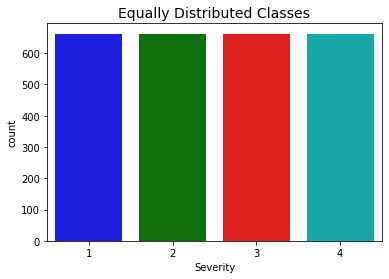

In [34]:
# printing the bar f=graph of under sampling of data
print('Distribution of the Classes in the subsample dataset')
print(new_df['Severity'].value_counts()/len(new_df))


colors = ['b', 'g', 'r', 'c']
sns.countplot('Severity', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# Dividing the data into train and test sets

In [0]:
# Dividing X and y values of dataset
X = df1.drop('Severity', axis=1)
y = df1['Severity']

In [0]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Modelling

In [0]:
# Let's implement simple classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [0]:
classifiers = {
    "KNearest": KNeighborsClassifier(),
    
}

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
grid_knears = KNeighborsClassifier()
grid_knears.fit(X_train, y_train)
y_pred = grid_knears.predict(X_test)
training_score = cross_val_score(grid_knears, X_train, y_train, cv=5)
test_score = accuracy_score(y_test, y_pred)

In [0]:
print("Classifiers:  Has a training score of", round(training_score.mean(), 2) * 100, "% Training accuracy score")
print("Classifiers: Has a test score of", test_score*100,"% Testing accuracy score")

Classifiers:  Has a training score of 65.0 % Training accuracy score
Classifiers: Has a test score of 65.08796962070825 % Testing accuracy score


In [0]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
f, axes = plt.subplots(ncols=3, figsize=(20,3))
i =0
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    test_score = accuracy_score(y_test, y_pred)
    print('Confusion Matrix: ',classifier.__class__.__name__,"\n", confusion_matrix(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d", ax=axes[i])
    axes[i].set_title(classifier.__class__.__name__)
    i= i+1
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% Training accuracy score")
    print("Classifiers: ", classifier.__class__.__name__, "Has a test score of", test_score*100,"% Testing accuracy score")

Confusion Matrix:  LogisticRegression 
 [[     0      0      4      0      0]
 [     0      0    174      3      0]
 [     0      0 593728  25453      0]
 [     0      0 218951  48096      0]
 [     0      0  57677   3823      0]]
Classifiers:  LogisticRegression Has a training score of 68.0 % Training accuracy score
Classifiers:  LogisticRegression Has a test score of 67.70945312260987 % Testing accuracy score


In [0]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

In [0]:
# Overfitting Case

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')


In [0]:
# ROC curve of the classifier of k nearest neighbour
from sklearn.metrics import roc_auc_score
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))


In [0]:
# Standard scalar of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Fit on training set only.
scaler.fit(X)
Apply transform to both the training set and the test set.
transform = scaler.transform(X)
test_img = scaler.transform(test_img)
scalarX = pd.DataFrame(transform)

scalarX.head()

In [0]:
# PCA for the dataset
from sklearn.decomposition import PCA
Make an instance of the Model
pca = PCA(.95)
pca.fit(scalarX)
train_img = pca.transform(scalarX)
train = pd.DataFrame(train_img)
train.head()

In [0]:
# Stratified k fold splitting
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train: [ 571  572  576 ... 3321 3322 3323] Test: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

In [0]:
# K nearest neighbour classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

# Evaluations

In [0]:
# Accuracy metrics
from sklearn.metrics import accuracy_score
y_pred = neigh.predict(X_test)
accuracy= accuracy_score(y_test, y_pred)
print(accuracy)


0.6573425984181197


In [0]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[     0,    107,     19,      1],
       [     0, 202884,  28616,    365],
       [     0,  82052,  30819,    261],
       [     0,   8029,   2547,    332]])

In [0]:
# Plot of Confusion matrix
import seaborn as sns

df_cm = pd.DataFrame(
        confusion_matrix(y_test, y_pred)
)
df_cm


,0,1,2,3
0,0,107,19,1
1,0,202884,28616,365
2,0,82052,30819,261
3,0,8029,2547,332


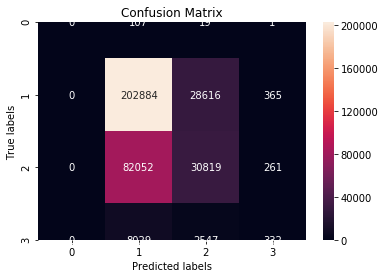

<Figure size 288x288 with 0 Axes>

In [0]:
ax= plt.subplot()
plt.figure(figsize = (4,4))
sns.heatmap(df_cm, annot=True, ax = ax,fmt='d'); #annot=True to annotate cells
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names);

In [0]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)
clf.predict(X_test)
clf.score(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.6503373301763049

In [0]:
# Support vector machines
from sklearn.svm import SVC
clf3 = SVC(gamma='auto')
clf3.fit(X_train, y_train)
clf3.score(X_train, y_train)
y_pred_svm = clf3.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(accuracy_svm)

In [0]:
# Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=0.08)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6512476406615135


In this ipynb file, K nearest neighbour and adaboost algorithms are used to find the model accuracy, K nearest neighbours and adaboost both the algorithms got the accuracy of 65%.